In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
import numpy as np
import random

def mod(x, y):
    return (y + x) % y

def get_adj(tdim):
    td0, td1 = tdim
    N = td0 * td1
    adj = np.zeros((N * 4,), dtype=int)
    for i in range(td0):
        for j in range(td1):
            adj[td1 * 4 * i + j * 4 + 0] = mod(i - 1, td0) * td1 + mod(j, td1)
            adj[td1 * 4 * i + j * 4 + 1] = mod(i, td0) * td1 + mod(j - 1, td1)
            adj[td1 * 4 * i + j * 4 + 2] = mod(i, td0) * td1 + mod(j + 1, td1)
            adj[td1 * 4 * i + j * 4 + 3] = mod(i + 1, td0) * td1 + mod(j, td1)
    return adj

def get_allow(blocks, bdim):
    bd0, bd1, bd2 = bdim
    horz = np.zeros((bd0, bd0), dtype=int)
    for i in range(bd0):
        for j in range(bd0):
            horz[i][j] = 1
            for k in range(bd1):
                if blocks[i][k][0] != blocks[j][k][bd2 - 1]:
                    horz[i][j] = 0
                    break
    vert = np.zeros((bd0, bd0), dtype=int)
    for i in range(bd0):
        for j in range(bd0):
            vert[i][j] = 1
            for k in range(bd2):
                if blocks[i][0][k] != blocks[j][bd1 - 1][k]:
                    vert[i][j] = 0
                    break
    allow = np.zeros((4 * (bd0 + 1), bd0), dtype=int)
    for i in range(bd0):
        for j in range(bd0):
            if horz[i][j]:
                allow[i * 4][j] = 1
                allow[i * 4 + 2][j] = 1
            if vert[i][j]:
                allow[i * 4 + 1][j] = 1
                allow[i * 4 + 3][j] = 1
    return allow

def get_random_state(rng, N):
    state = np.zeros((N,), dtype=int)
    available = np.arange(N)
    for i in range(N):
        ind = rng.randint(0, N - i - 1)
        state[i] = available[ind]
        available[ind] = available[N - i - 1]
    return state
def run_wave(rng, blocks, bdim, tdim, adj, allow, N):
    state = get_random_state(rng, N)
    for i in range(N):
        for j in range(4):
            ni = adj[4 * i + j]
            a = state[i] * 4 + j
            b = state[ni] * 4 + (j + 2) % 4
            if allow[a][state[ni]] == 0:
                state[ni] = state[i]
                return False, state
    return True, state

if __name__ == '__main__':
    import numpy as np
    import random

    # Set the blocks
    blocks = np.array([[[2, -1, 0, 0, 0], [-1, 2, -1, 0, 0]], [[0, -1, 2, -1, 0], [0, 0, -1, 2, -1]], [ [0, 0, 0, -1, 2],  [0, 0, 0, -1, 2]]])
    bdim = (3, 2, 2)

    # Set the tiling dimensions
    tdim = (2, 2)

    # Calculate the adjacency matrix
    adj = get_adj(tdim)

    # Calculate the allowed blocks matrix
    allow = get_allow(blocks, bdim)

    # Set the random number generator
    rng = random.Random(655)

    # Calculate the number of tiles
    N = np.prod(tdim)

    # Run the wave algorithm
    success, state = run_wave(rng, blocks, bdim, tdim, adj, allow, N)

    # Print the results
    if success:
        print("Successful tiling found: ", state)
    else:
        print("Failed to find a tiling")



Failed to find a tiling


In [8]:
import cmath
import numpy as np
 
def fft(buf):
    n = len(buf)
    if n == 1:
        return buf
 
    even = fft(buf[::2])
    odd = fft(buf[1::2])
    T = [cmath.exp(-2j * cmath.pi * k / n) * odd[k] for k in range(n // 2)]
    return [even[k] + T[k] for k in range(n // 2)] + [even[k] - T[k] for k in range(n // 2)]
 
def show(s, buf):
    print(s + " ".join(str(x) for x in buf))
 
buf = [1, 1, 1, 1, 0, 0, 0, 0]
show("Data: ", buf)
buf = fft(buf)
show("FFT: ", buf)


Data: 1 1 1 1 0 0 0 0
FFT: (4+0j) (1-2.414213562373095j) 0j (1-0.4142135623730949j) 0j (1+0.41421356237309515j) 0j (0.9999999999999997+2.414213562373095j)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline


C:\Users\jarc5624\AppData\Local\Temp\ipykernel_24972\2378172170.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


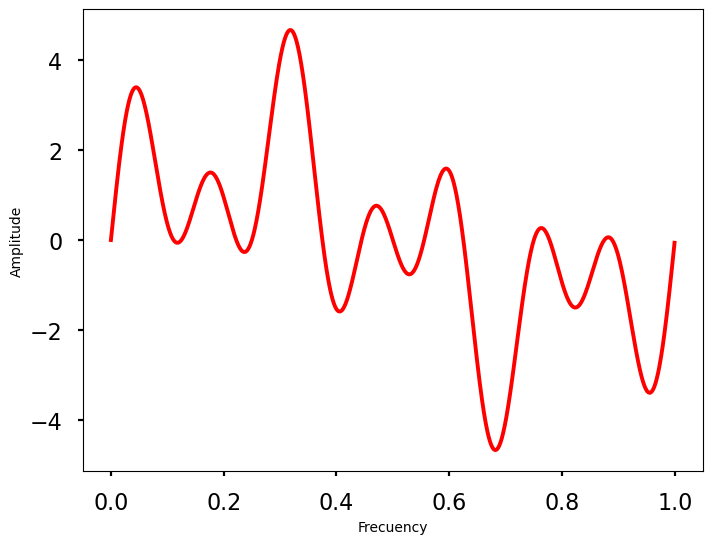

In [34]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 1.618033*np.sin(2*np.pi*freq*t)

freq = 4
x += 1.618033*np.sin(2*np.pi*freq*t)

freq = 7   
x += 1.618033* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Frecuency')

plt.show()

C:\Users\jarc5624\AppData\Local\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


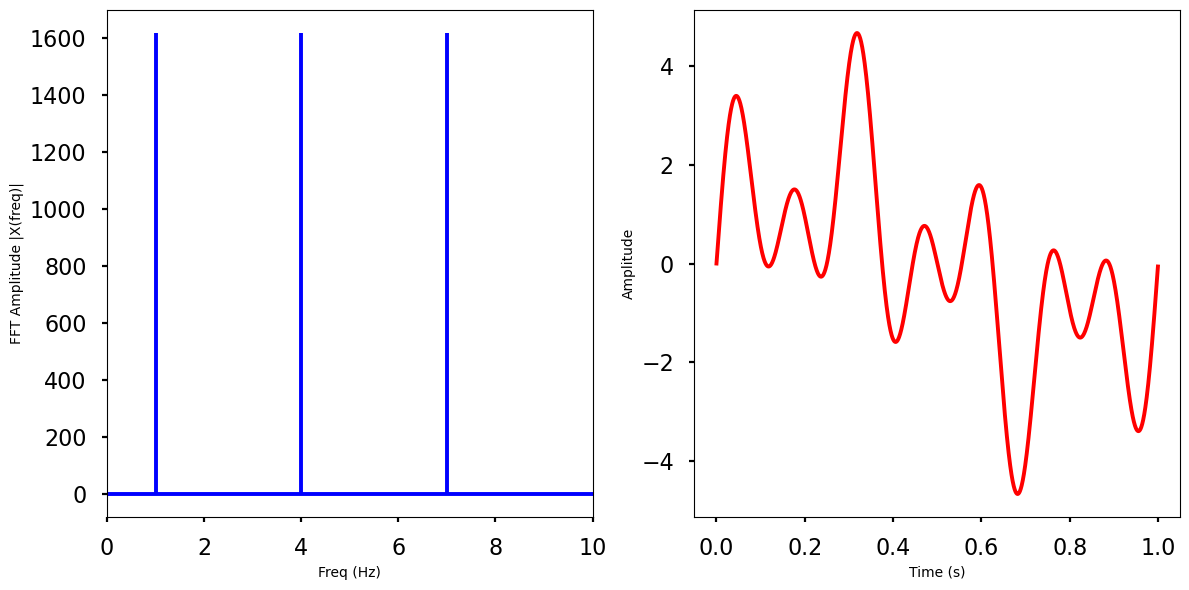

In [35]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [32]:
%timeit fft(x)

93 µs ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


/tmp/ipykernel_542/1207951055.py:8: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


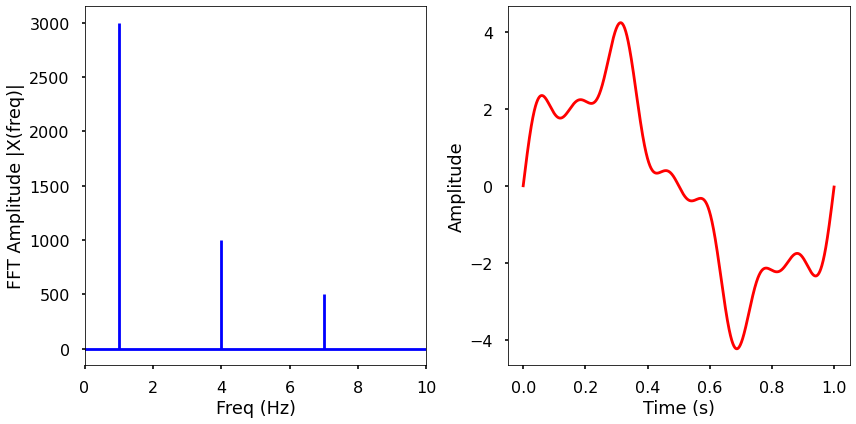

In [33]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [34]:
%timeit fft(x)

50.4 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('cost_usage_report.csv')

In [38]:
print(df)

          Service  WorkSpaces($)  AppStream($)    Tax($)  Config($)  \
0   Service total  714821.646392    150513.959  50548.93   9665.022   
1      2022-05-01   21805.915783     11015.674   2005.20   1077.402   
2      2022-06-01   28528.296806     12931.797   2471.08    739.218   
3      2022-07-01   31767.841952     12785.096   2647.39    744.519   
4      2022-08-01   32991.205925     13630.368   2763.52    702.333   
5      2022-09-01   48075.577362     13350.376   3590.32    610.488   
6      2022-10-01   53610.423719     13600.371   3901.51    365.796   
7      2022-11-01   76713.142868     13082.406   5185.50    351.018   
8      2022-12-01   76570.878322     11940.469   5174.16   1214.568   
9      2023-01-01   79690.524290     12304.999   5370.40   1181.223   
10     2023-02-01   81054.090909     11482.012   5372.92    882.243   
11     2023-03-01   86382.299556     12330.391   5734.28    912.846   
12     2023-04-01   97631.448900     12060.000   6332.65    883.368   

     

In [39]:
print(df.columns)

Index(['Service', 'WorkSpaces($)', 'AppStream($)', 'Tax($)', 'Config($)',
       'VPC($)', 'CloudTrail($)', 'CloudWatch($)', 'Security Hub($)',
       'EC2-Other($)', 'GuardDuty($)', 'QuickSight($)', 'Cost Explorer($)',
       'Relational Database Service($)', 'S3($)', 'EC2-Instances($)',
       'Direct Connect($)', 'Route 53($)', 'Key Management Service($)',
       'Glue($)', 'Secrets Manager($)', 'Directory Service($)', 'SNS($)',
       'Lambda($)', 'SQS($)', 'Step Functions($)', 'Systems Manager($)',
       'Comprehend($)', 'Polly($)', 'DynamoDB($)', 'CloudWatch Events($)',
       'Glacier($)', 'WorkDocs($)', 'Lex($)', 'Service Catalog($)',
       'CloudShell($)', 'Total costs($)'],
      dtype='object')


In [40]:
signal = df['WorkSpaces($)'].values


In [41]:
signal

array([714821.64639227,  21805.91578297,  28528.29680552,  31767.84195226,
        32991.20592473,  48075.57736228,  53610.42371865,  76713.14286832,
        76570.87832241,  79690.52429025,  81054.09090863,  86382.29955617,
        97631.44890008])

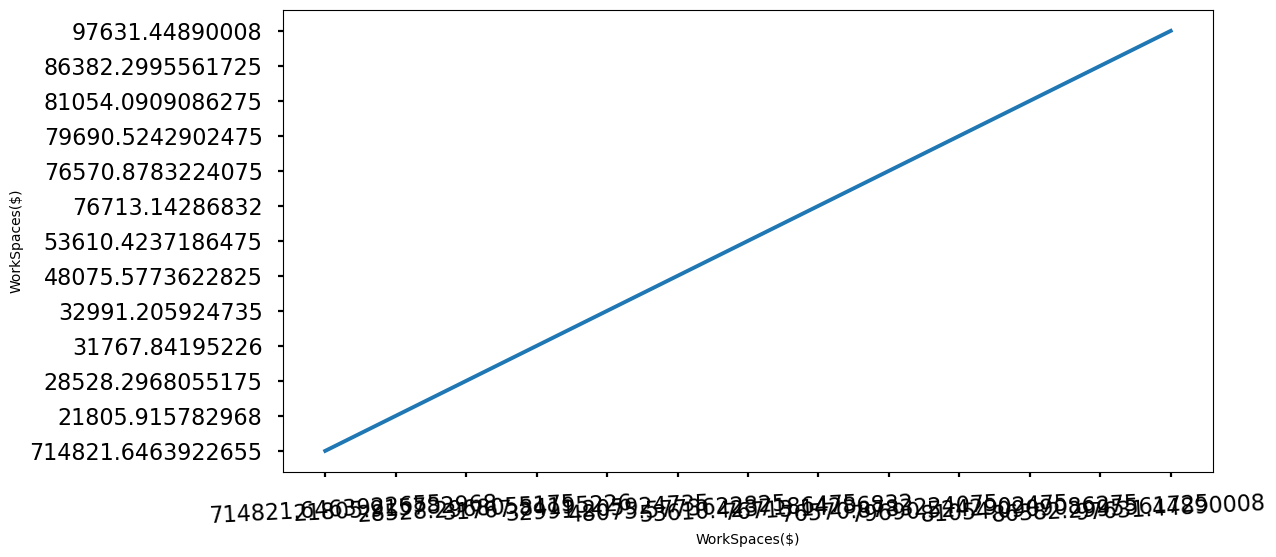

In [52]:
plt.figure(figsize = (12, 6))
plt.plot(df['WorkSpaces($)'], df['WorkSpaces($)'])
plt.xlabel('WorkSpaces($)')
plt.ylabel('WorkSpaces($)')
plt.xticks(rotation=3) 
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fft_spectrum(demand_series):
    X = np.fft.fft(demand_series)
    N = len(X)
    n = np.arange(N)
    sr = 1 / (60*60)
    T = N/sr
    freq = n/T 

    n_oneside = N//2
    f_oneside = freq[:n_oneside]

    plt.figure(figsize = (12, 6))
    plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.show()
plt.show()


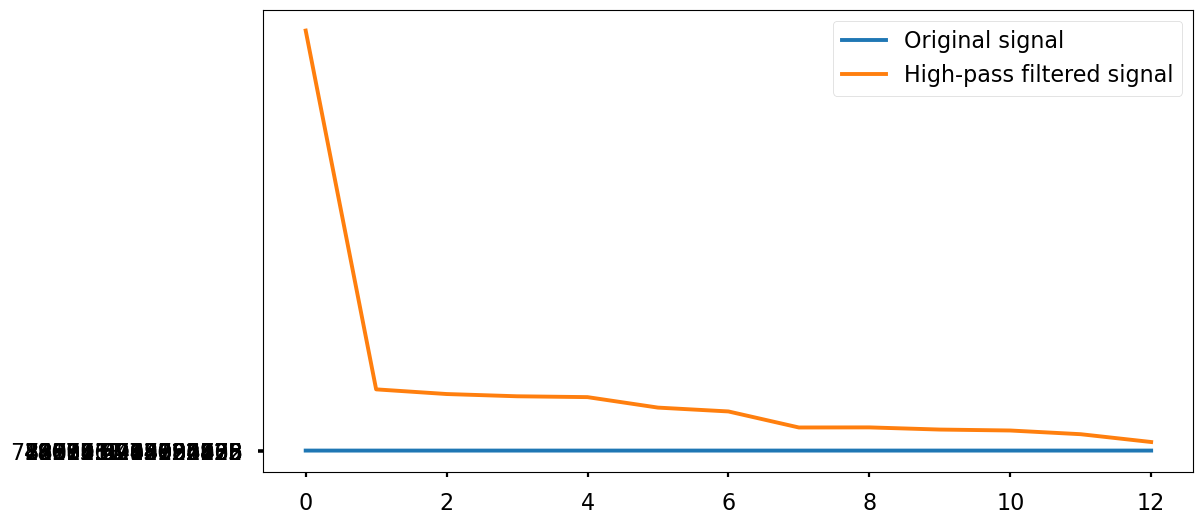

In [53]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('cost_usage_report.csv', delimiter=',', parse_dates=[1])

# Get the signal
signal = df['WorkSpaces($)']

# Perform FFT
fft_signal = np.fft.fft(signal)

# Define the high-pass filter cutoff frequency
cutoff_frequency = 0.1

# Get the length of the signal
N = len(signal)

# Get the frequency array
freq = np.fft.fftfreq(N, 1/(60*60))

# Get the high-pass filter mask
mask = np.abs(freq) > cutoff_frequency

# Apply the high-pass filter mask
fft_signal[np.logical_not(mask)] = 0

# Perform inverse FFT to get back to the time domain
filtered_signal = np.fft.ifft(fft_signal)


# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(signal, label='Original signal')
plt.plot(np.abs(filtered_signal), label='High-pass filtered signal')
plt.legend()
plt.show()



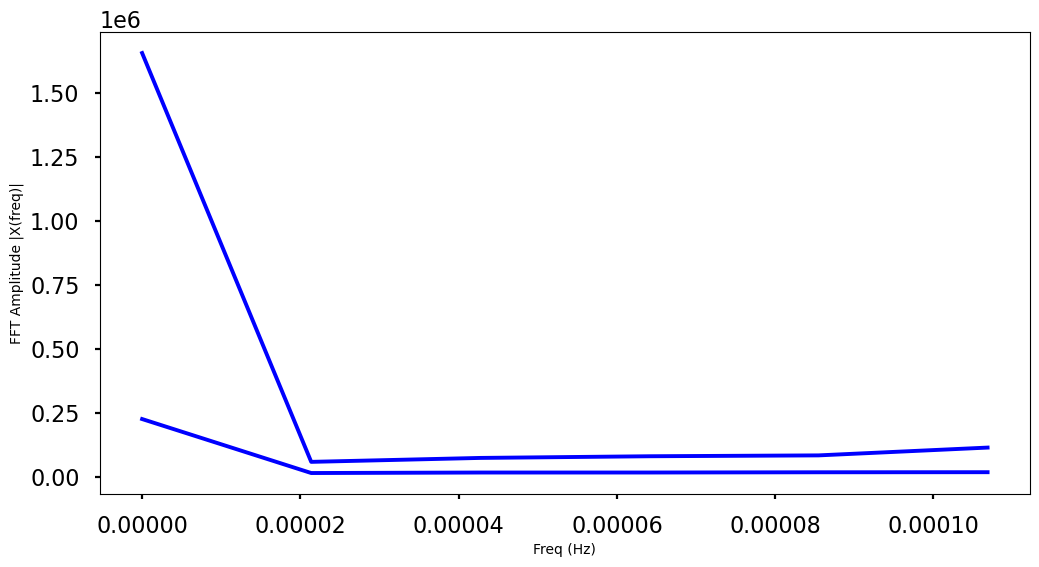

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_fft_spectrum(demand_series):
    X = np.fft.fft(demand_series)
    N = len(X)
    n = np.arange(N)
    sr = 1 / (60*60)
    T = N/sr
    freq = n/T 

    n_oneside = N//2
    f_oneside = freq[:n_oneside]

    plt.figure(figsize = (12, 6))
    plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.show()

# Example usage:
df = pd.read_csv("cost_usage_report.csv")
df.rename(columns={'Total costs($)':'WorkSpaces($)'}, inplace=True)
plot_fft_spectrum(df['WorkSpaces($)'])



In [182]:
!pip install pydub
from scipy.io.wavfile import write
import numpy as np
import pandas as pd
from pydub import AudioSegment

# Load the data
df = pd.read_csv('930-data-export.csv', delimiter=',', parse_dates=[1])

# Get the signal
signal = df['Selected Hour Demand (MWh)']

# Perform FFT
fft_signal = np.fft.fft(signal)

# Define the high-pass filter cutoff frequency
cutoff_frequency = 0.1

# Get the length of the signal
N = len(signal)

# Get the frequency array
freq = np.fft.fftfreq(N, 1/(60*60))

# Get the high-pass filter mask
mask = np.abs(freq) > cutoff_frequency

# Apply the high-pass filter mask
fft_signal[np.logical_not(mask)] = 0

# Perform inverse FFT to get back to the time domain
filtered_signal = np.fft.ifft(fft_signal)

# Convert the filtered signal into a wav file
signal_16bit = np.array(filtered_signal, dtype=np.int16)
write("filtered_signal.wav", 44100, signal_16bit)

# Convert the wav file into a mp3 file
sound = AudioSegment.from_wav("filtered_signal.wav")
sound.export("filtered_signal.mp3", format="mp3")


/tmp/ipykernel_542/749662594.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_16bit = np.array(filtered_signal, dtype=np.int16)


<_io.BufferedRandom name='filtered_signal.mp3'>

In [139]:
df.rename(columns={'Selected Hour Demand (MWh)':'demand'}, inplace=True)


In [140]:
signal = df['demand'].values


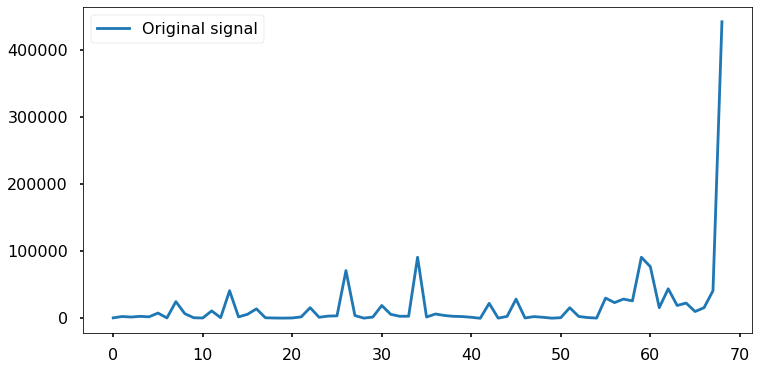

In [141]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(signal, label='Original signal')
plt.legend()
plt.show()

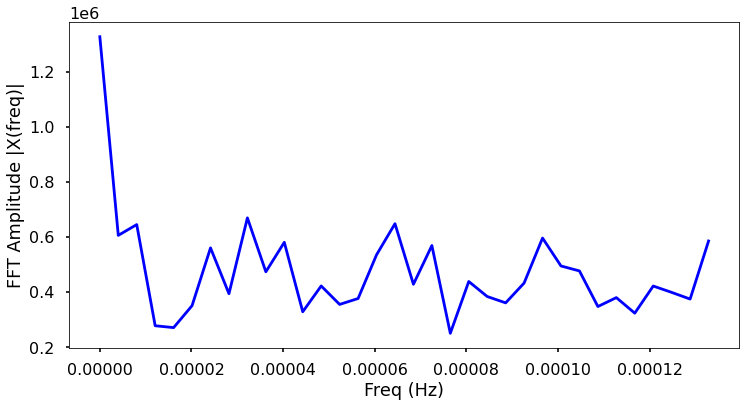

In [173]:
X = fft(df['Selected Hour Demand (MWh)'])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

/tmp/ipykernel_542/1034189290.py:2: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


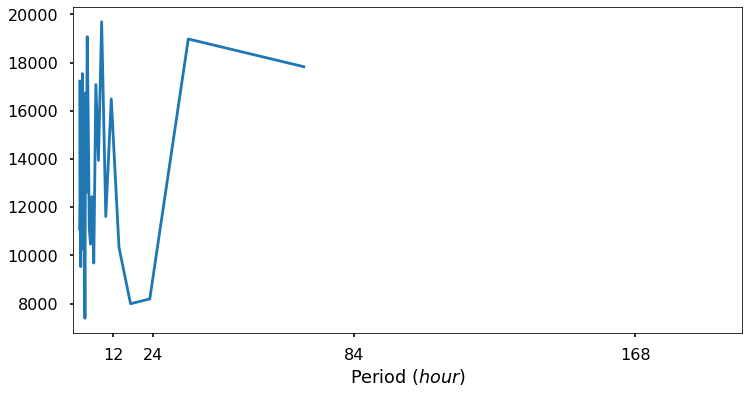

In [174]:
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.show()

In [175]:
import pandas as pd

df = pd.read_csv('930-data-export.csv', 
                 delimiter=',', parse_dates=[1])


In [176]:
df

,Region Code,Region Type,Selected Hour Timestamp (Hour Ending),Selected Hour Demand (MWh),Prior Hour Demand (MWh),Percent Change from Prior Hour
0,AEC,BA,11/30/2019 4p.m. PST,459,432,6%
1,AECI,BA,11/30/2019 4p.m. PST,2457,2203,12%
2,AVA,BA,11/30/2019 4p.m. PST,1630,1592,2%
3,AZPS,BA,11/30/2019 4p.m. PST,2681,2455,9%
4,BANC,BA,11/30/2019 4p.m. PST,1961,1897,3%
...,...,...,...,...,...,...
64,SE,Region,11/30/2019 4p.m. PST,22521,21596,4%
65,SW,Region,11/30/2019 4p.m. PST,9891,9259,7%
66,TEN,Region,11/30/2019 4p.m. PST,15580,15299,2%
67,TEX,Region,11/30/2019 4p.m. PST,40908,40604,1%


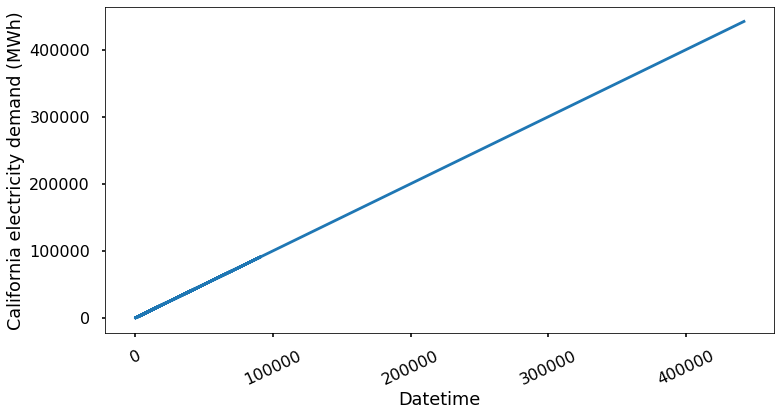

In [177]:
plt.figure(figsize = (12, 6))
plt.plot(df['Selected Hour Demand (MWh)'], df['Selected Hour Demand (MWh)'])
plt.xlabel('Datetime')
plt.ylabel('California electricity demand (MWh)')
plt.xticks(rotation=25) 
plt.show()

In [178]:
from scipy.fftpack import fftfreq

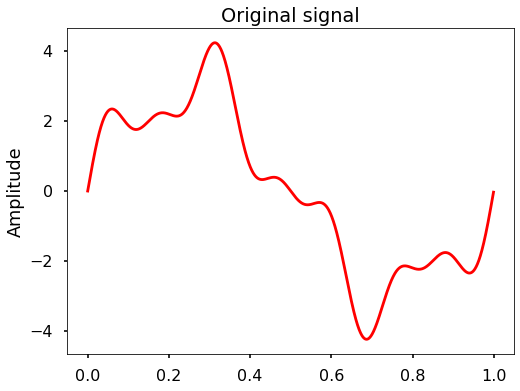

In [179]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.show()

/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


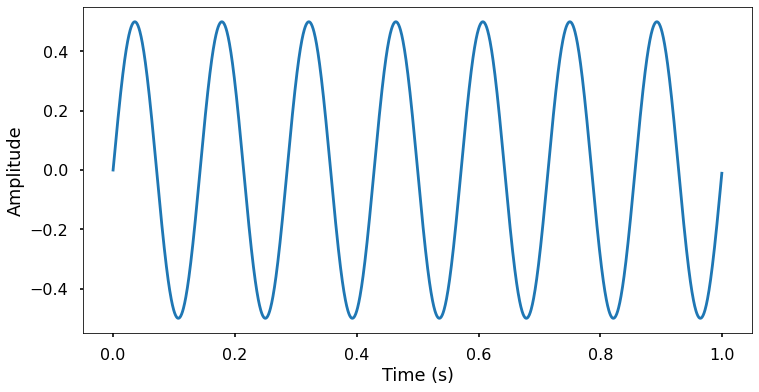

/tmp/ipykernel_542/1306066186.py:30: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(sig_fft), 'b', \
/tmp/ipykernel_542/1306066186.py:37: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(sig_fft_filtered), 'b', \


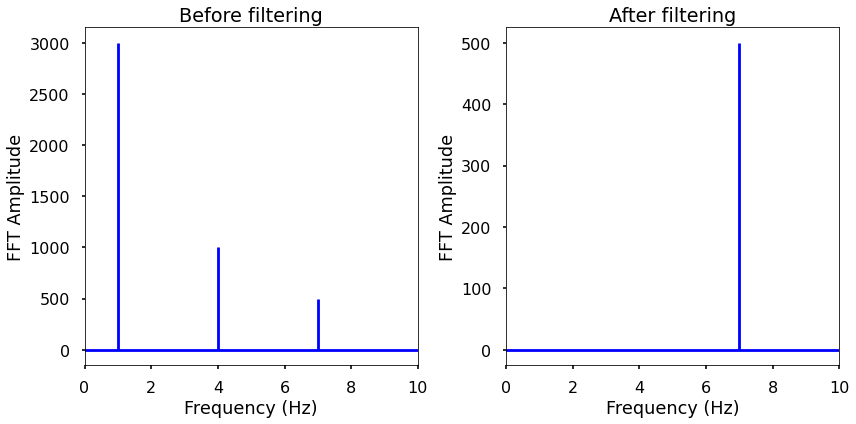

In [180]:
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

/tmp/ipykernel_542/1248668741.py:4: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


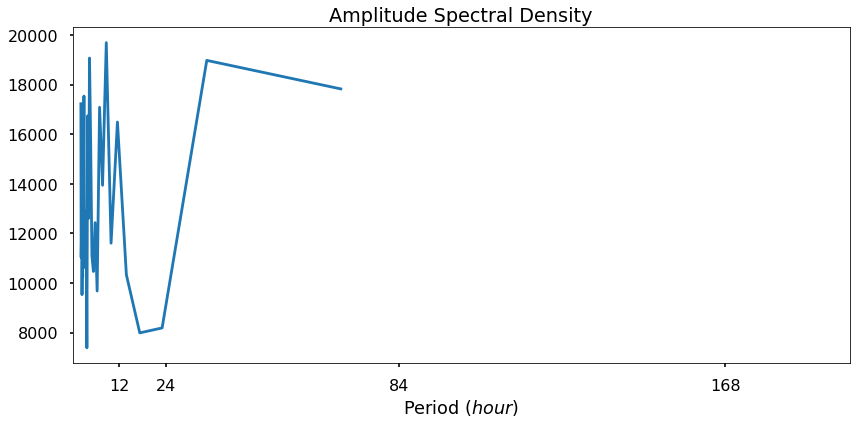

In [186]:
import matplotlib.pyplot as plt

# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))

plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.title("Amplitude Spectral Density")
plt.tight_layout()
plt.show()


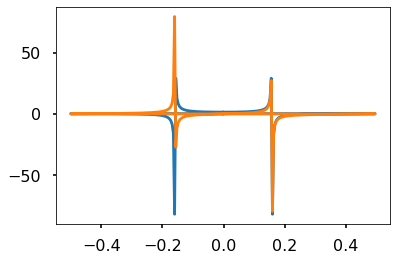

In [190]:
import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [193]:
np.fft.fft(np.exp(2j * np.pi * np.arange(8) / 8))

array([-3.44509285e-16+1.14423775e-17j,  8.00000000e+00-8.11483250e-16j,
        2.33486982e-16+1.22464680e-16j,  0.00000000e+00+1.22464680e-16j,
        9.95799250e-17+2.33486982e-16j,  0.00000000e+00+7.66951701e-17j,
        1.14423775e-17+1.22464680e-16j,  0.00000000e+00+1.22464680e-16j])

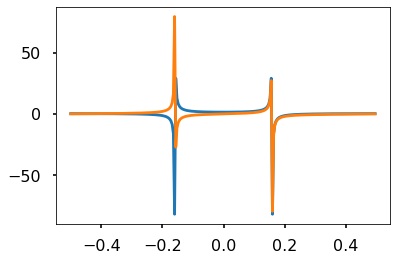

In [194]:
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
t = np.arange(256)
sp = fftshift(fft(np.sin(t)))
freq = fftshift(fftfreq(t.shape[-1]))
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np

# Define the logarithmically averaged function
def f(a, g, h, x, m):
    sum = 0
    for n in range(int(x // m), int(x) + 1):
        prod = 1
        for k in range(len(g)):
            prod *= g[k](n + a * h[k])
        sum += prod
    return (1 / np.log(m)) * sum

# Define the values for the function inputs
g = [
    lambda n: np.sin(n),
    lambda n: np.cos(n),
    lambda n: np.tan(n)
]
h = [1, 2, 3]
x = 100
m = 1000

# Choose a value of a for the filter circuit
a = 2

# Create the quantum circuit for signal filtering
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
qc = QuantumCircuit(qreg, creg)

# Apply the logarithmically averaged filter
for n in range(int(x // m), int(x) + 1):
    qc.rz(f(a, g, h, n, m), qreg[0])

# Measure the filtered signal
qc.measure(qreg[0], creg[0])

# Simulate the circuit and print the results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print(counts)


{'0': 1024}
